In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
import statsmodels.api as sm
from scipy.stats import levene
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

from warnings import filterwarnings
filterwarnings('ignore') 


## Charger et prétraiter les données

In [165]:
df = pd.read_csv('billets_production.csv', sep=',')

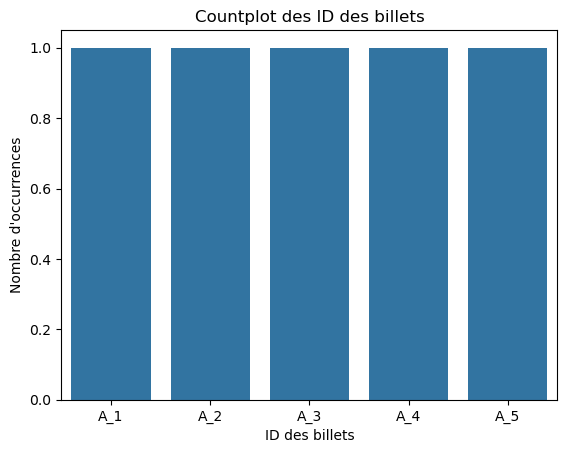

In [167]:
sns.countplot(x='id', data=df)  # Remplacez 'id' par la colonne que vous souhaitez visualiser
plt.xlabel('ID des billets')  # Remplacez par le nom de votre variable
plt.ylabel('Nombre d\'occurrences')
plt.title('Countplot des ID des billets')  # Remplacez par le titre de votre graphique
plt.show()

In [169]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df.shape[1]))

Le tableau comporte 5 observation(s) ou article(s)
Le tableau comporte 7 colonne(s)


In [171]:
df.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [173]:

df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,171.954000,104.188000,103.972000,4.882000,3.238000,112.322000
std,0.326542,0.396257,0.393027,0.836821,0.142724,0.897201
min,171.650000,103.630000,103.540000,3.770000,3.030000,111.420000
25%,171.760000,104.010000,103.560000,4.440000,3.160000,111.570000
50%,171.870000,104.170000,104.130000,4.990000,3.300000,112.090000
75%,172.000000,104.550000,104.290000,5.210000,3.310000,113.200000
max,172.490000,104.580000,104.340000,6.000000,3.390000,113.330000


In [175]:
print(df.columns)

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length', 'id'],
      dtype='object')


In [177]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Instancier l'imputer pour remplacer les valeurs manquantes par la moyenne
imputer = SimpleImputer(strategy='mean')

# Appliquer l'imputer aux données
features = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
df[features] = imputer.fit_transform(df[features])

# Instancier le Scaler
scaler = MinMaxScaler()

# Appliquer le Scaler aux données
data_array = scaler.fit_transform(df[features])

# Transformer le tableau en DataFrame
df_scaled = pd.DataFrame(data_array, columns=features)


In [179]:
# verifier que les min et max des variables sont tous 0 et 1
df_scaled.describe().loc[['min','max']]

,diagonal,height_left,height_right,margin_low,margin_up,length
min,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0


# Charger le fichier CSV
df = pd.read_csv('billets_production.csv', sep=',')

# Supprimer la colonne 'id'
df = df.drop(columns=['id'])

# Instancier l'imputer pour remplacer les valeurs manquantes par la moyenne
imputer = SimpleImputer(strategy='mean')

# Appliquer l'imputer aux données
features = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
df[features] = imputer.fit_transform(df[features])

# Instancier le Scaler
scaler = MinMaxScaler()

# Appliquer le Scaler aux données
data_array = scaler.fit_transform(df[features])

# Transformer le tableau en DataFrame
df_scaled = pd.DataFrame(data_array, columns=features)



from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Séparer les caractéristiques et la cible
#X = df_scaled
#y = df['is_genuine'] if 'is_genuine' in df.columns else [1] * len(df)




## Diviser les données en ensembles d'entraînement et de test :

In [184]:


X = df_scaled[features].values
y = df['is_genuine'].values if 'is_genuine' in df.columns else [1] * len(df)  # Utilisez une colonne existante comme cible ou créez une colonne temporaire
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)


# Vérifiez le nombre d'échantillons d'entraînement
print(f"Nombre d'échantillons d'entraînement : {len(X_train)}")


Nombre d'échantillons d'entraînement : 4


## Ajuster le nombre de voisins et entraîner le modèle :

In [187]:
from sklearn import neighbors

n_neighbors = min(5, len(X_train))  # Ajuster le nombre de voisins en fonction du nombre d'échantillons d'entraînement
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=4)

In [189]:
#Évaluer les performances :
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 1.0


## Enregistrer le modèle avec pickle

## Charger le modèle enregistré et l'utiliser pour faire des prédictions :

In [193]:


# Charger le modèle depuis le disque
#loaded_model = pickle.load(open(filename, 'rb'))

# Faire des prédictions 
new_labels = knn.predict(X)
df['predicted_is_genuine'] = new_labels

# Afficher le DataFrame avec la nouvelle colonne
print(df)



   diagonal  height_left  height_right  margin_low  margin_up  length   id  \
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1   
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2   
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3   
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4   
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5   

   predicted_is_genuine  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  


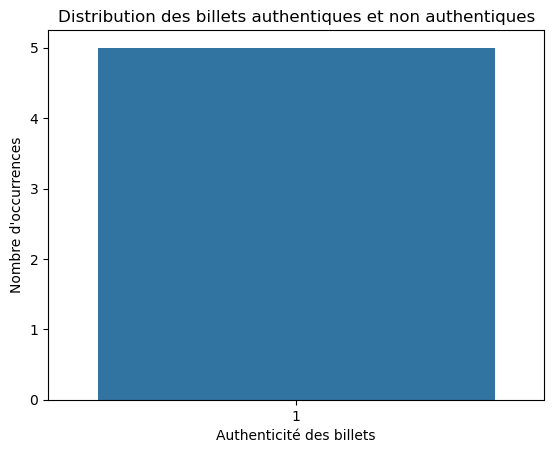

In [195]:
sns.countplot(x='predicted_is_genuine', data=df)
plt.xlabel('Authenticité des billets')
plt.ylabel('Nombre d\'occurrences')
plt.title('Distribution des billets authentiques et non authentiques')
plt.show()

In [197]:
# Instancier le classificateur KNN avec un nombre de voisins inférieur
knn = KNeighborsClassifier(n_neighbors=3)

# Entraîner le classificateur
knn.fit(X_train, y_train)

# Prédire les valeurs de test
y_pred = knn.predict(X_test)

# Calcul du RMSE, du score, etc.
mse = mean_squared_error(y_test, y_pred)
rmse_test = sqrt(mse)
accuracy_KNN = round(accuracy_score(y_test, y_pred) * 100, 3)

print(f"RMSE: {rmse_test}")
print(f"Accuracy: {accuracy_KNN}%")


RMSE: 0.0
Accuracy: 100.0%


In [199]:
#calcul du RMSE, du score, etc.
from math import sqrt
mse = mean_squared_error(y_test, y_pred)
rmse_test = sqrt(mse)
accuracy_KNN = round(accuracy_score(y_test, y_pred)*100,3)
confusion_matrix_KNN = confusion_matrix(y_test, y_pred)
precision_KNN = round(precision_score(y_test, y_pred)*100,3)
recall_KNN = round(recall_score(y_test, y_pred)*100,3)
print('Le RMSE du test est de {}'.format(round(rmse_test,3)))
print('Le score de prédiction est de {} %'.format(accuracy_KNN))
print(confusion_matrix_KNN)
print('---------')
print(classification_report(y_test, y_pred))
print("Precision:", precision_KNN)
print("Recall:", recall_KNN)



Le RMSE du test est de 0.0
Le score de prédiction est de 100.0 %
[[1]]
---------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Precision: 100.0
Recall: 100.0
